## **Introduction**
In the first version of the project, I like to do exploratory data analysis. This is where I analyze the data in detail to understand the independent variables and how they relate to one another. This version does not involve any modelling. It is mostly for exploratory data analysis. 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# pd.set_option('display.max_rows', None)  # Show all rows

In [2]:
#Get the dataset
dataset = pd.read_csv('loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Analysis
There are columns that have missing values. The total values should be 614. 
Gender, Married, dependents, self-employed, LoanAmount, LoanAmountTerm, and Credit_History all feaure missing values. 
This is important information to have.

## Way Forward
From here, the way forward is to analyze each column and determine its impact on the loan status. The first column is the gender. Does this have an impact on the person's ability to pay a loan?

In [5]:
# Check missing values which can affect the analysis by skewing the data
print(dataset['Gender'].isnull().sum())

13


In [6]:
# With the missing values and the data being categorical, I will use mode to fill in the missing data instead of dropping them.  
# The missing data is also less than 20%
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])

In [7]:
pd.crosstab(dataset['Gender'], dataset['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64


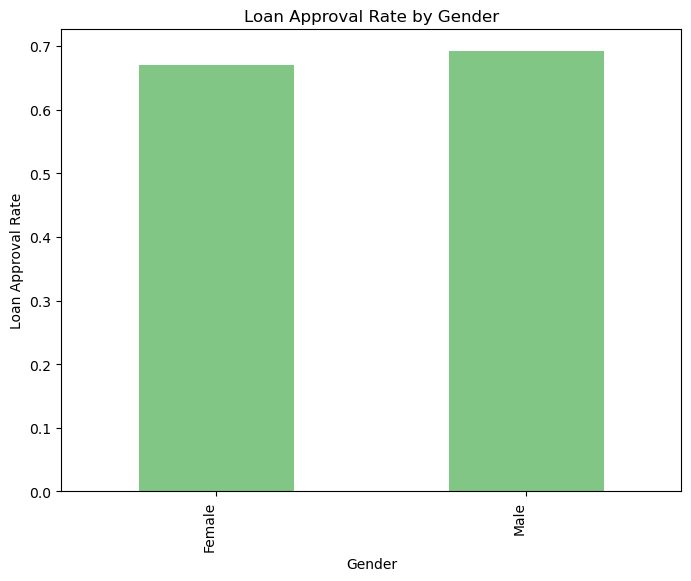

In [8]:
#Change the Loan_Status to numeric values
dataset['Loan_Status'] = dataset['Loan_Status'].map({'Y': 1, 'N': 0})
# Visual representation of how each gender pays their loans
loan_approval_rate = dataset.groupby('Gender')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Analysis
The loan approval rate is almost the same based on gender. There is really no difference. This means that gender is not a factor when it comes to loan approval. This means that this is not a variable to consider as the bank is gender neutral and does not consider gender when giving out loans. I also want to check using Chi-Square the p-value and whether it has any impact on the significance level. 

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Gender'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 0.11087854691241235, P-value: 0.7391461310869638


## Conclusion
The p-value is significantly greater than the significance level (0.05). This means that the relationship between gender and loan approval is not statistically significant. 

# Married Column
I want to now check what impact being married has on the person's ability to get a loan. 

In [10]:
#First, we check if there are missing values that can make data analysis difficult
print(dataset['Married'].isnull().sum())

3


In [11]:
# I Use mode to fill the missing values as they are not many
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])

In [12]:
pd.crosstab(dataset['Married'], dataset['Loan_Status'], margins = True)

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64


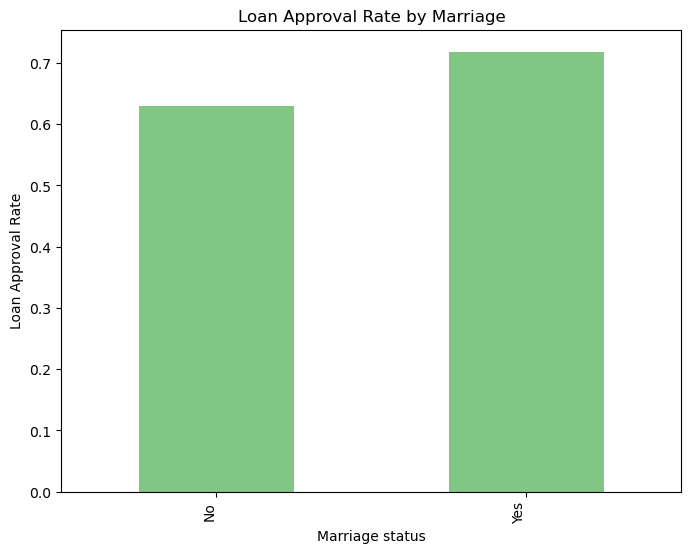

In [13]:
#Change the Loan_Status to numeric values
# Visual representation of how being married can impact loan approval
loan_approval_rate = dataset.groupby('Married')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Marriage')
plt.xlabel('Marriage status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Analysis
The difference between those that a married and those that are not for getting loans is around 8.9%, with being married proving to be an advantage in getting loan approval. However, I feel this is not enough to determine relation. I want to check for statistical significance using Chi-Square and p-value to understand the relation. 

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Married'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 4.73187557933362, P-value: 0.029608580862582116


## Conclusion on Married
The p-value is less than the significant level. 
This suggests that the relationship between being married and loan approval is significant. This means that it might be a factor when giving loans. However, there is one more thing I would like to check. I would like to check how it correlates with other variables. 
This is something I will do once I have thinned down the variables I intend on using. 

# Dependents Column
For the dependents column, I want to try and get two new relations to see which one is significant. 
I noticed when reviewing the dataset that aside from having missing values, the data features only four values: 0, 1, 2, 3+. 
With this, I can create two different columns. 
The first will be the has_dependents variable, which will check for the presence of dependents. 
The second will be the has many dependents, which will feature the people with 3 or more dependents. 
This will better allow me to analyze the relations between both and understand their significance. 

In [15]:
print(dataset['Gender'].isnull().sum())

0


In [16]:
#Fill Missing Values
# Because it is still categorical values, I will be using mode still. 
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

In [17]:
# Creating the Has Dependents Column
has_dependents = []
value = 0
for data in dataset['Dependents']:
    if data == "3+":
        value = 1
    elif int(data)>0:
        value = 1
    else:
        value = 0
    has_dependents.append(value)
    
dataset['Has_Dependents'] = has_dependents


In [18]:
# Creating the Many Dependents Column
many_dependents = []
value = 0
for data in dataset['Dependents']:
    if data == "3+":
        value = 1
    else:
        value = 0
    many_dependents.append(value)
    
dataset['many_Dependents'] = many_dependents


# Followup
With both of these colums, I can advance to check whether either of them affects someone's ability to get a loan. 

Has_Dependents
0    0.686111
1    0.688976
Name: Loan_Status, dtype: float64


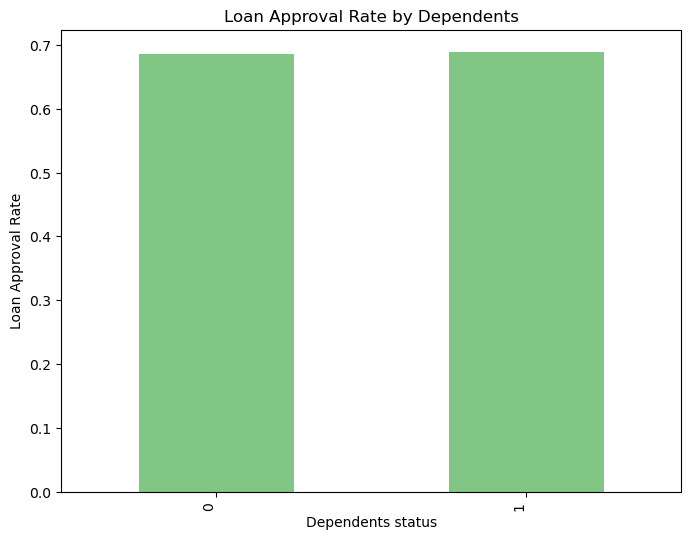

In [19]:
#Change the Loan_Status to numeric values
# Visual representation of how being married can impact loan approval
loan_approval_rate = dataset.groupby('Has_Dependents')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Dependents')
plt.xlabel('Dependents status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
From this, it seems as though there is little difference between having a dependent and getting a loan. 
The next step is to check the p-value to determine whether it is less than the significance level. 

In [20]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Has_Dependents'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 0.0, P-value: 1.0


In [42]:
print(dataset['Has_Dependents'].value_counts())
print(dataset['Loan_Status'].value_counts())

Has_Dependents
0    360
1    254
Name: count, dtype: int64
Loan_Status
1    422
0    192
Name: count, dtype: int64


# Analysis
The high p_value can mean one of two things. 
1. The data is corrupted.
2. There is absolutely no relationship between the two variables. 

In this case, I would argue for the latter. This is because I reviewed the data row by row and I saw several differences. This means that there is absolutely no relationship between the fact that the person has dependents to them getting a loan. However, it would be interesting to determine whether the number of dependents has an impact, particularly if they are more than three. 

many_Dependents
0    0.690941
1    0.647059
Name: Loan_Status, dtype: float64


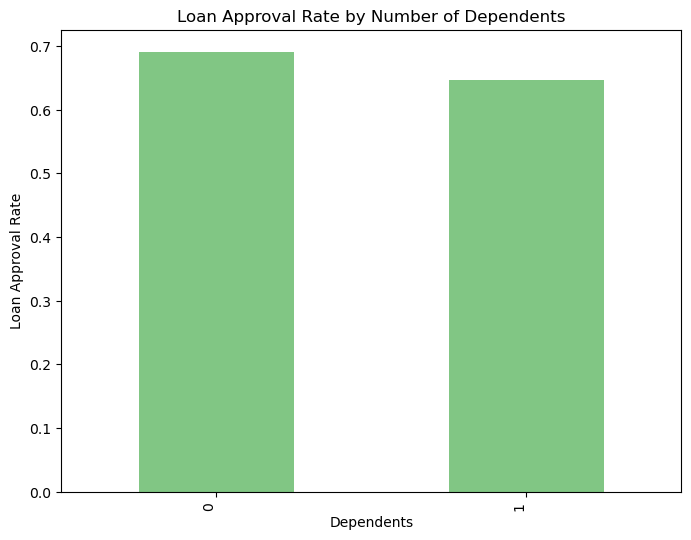

In [21]:
# Checking if many dependents affects the data
#Change the Loan_Status to numeric values

loan_approval_rate = dataset.groupby('many_Dependents')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

In [22]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['many_Dependents'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 0.23969662650260687, P-value: 0.624425312972677


## Analysis
While at first it looked as though having dependents had an impact, upon analysis, it is proven that having dependents is not a factor that can be considered when giving out loans. 


## The education Variable
The next variable to analyze is the education variable. 
The steps are:
1. Fill the missing values. 
2. Graphically represent the information. 
3. Find the p-value and establish whether the variables are connected. 

In [23]:
print(dataset['Education'].isnull().sum())
# This column has no missing values

0


In [24]:
#Change the Education to numeric values
dataset['Education'] = dataset['Education'].map({'Graduate': 1, 'Not Graduate': 0})
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents
0,LP001002,Male,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,1,0,0
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,0
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,1,0,0
610,LP002979,Male,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,1,1,1
611,LP002983,Male,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,1,1,0
612,LP002984,Male,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,1,1,0


Education
0    0.611940
1    0.708333
Name: Loan_Status, dtype: float64


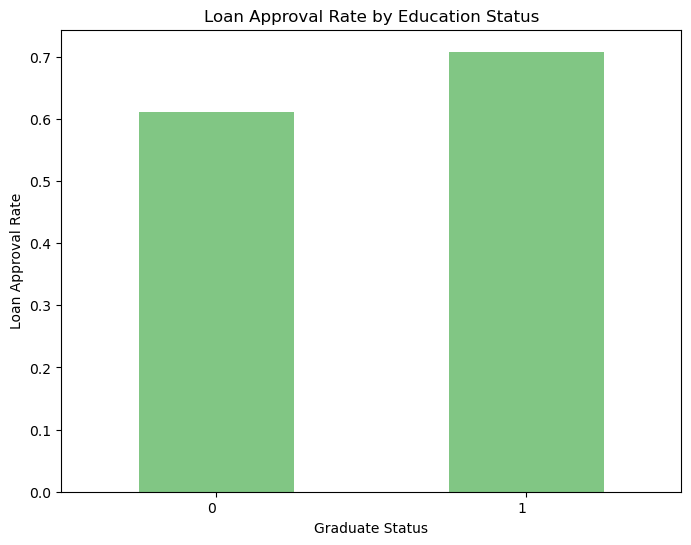

In [25]:
# # Visual representation of how each education pays their loans
loan_approval_rate = dataset.groupby('Education')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Education Status')
plt.xlabel('Graduate Status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
There is roughly a 9% difference between the application of graduates than those who are not. This shows that graduates may have a higher chance of getting loans when compared to nongraduates. 

In [26]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Education'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 4.091490413303622, P-value: 0.04309962129357353


# Analysis
The P-value also shows a relationship between both variables. This means that education status is a factor that is considered when giving loans. This is a variable that should make the model function better. 

The next one is self_employed. 

In [27]:
# The self employed column has missing values. I will use mode due to the categorical nature of the data 
# The missing data is also less than 20%
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [28]:
dataset['Self_Employed'] = dataset['Self_Employed'].map({'Yes': 1, 'No': 0})
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1,0,0
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,1
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,1,0
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,1,0


Self_Employed
0    0.687970
1    0.682927
Name: Loan_Status, dtype: float64


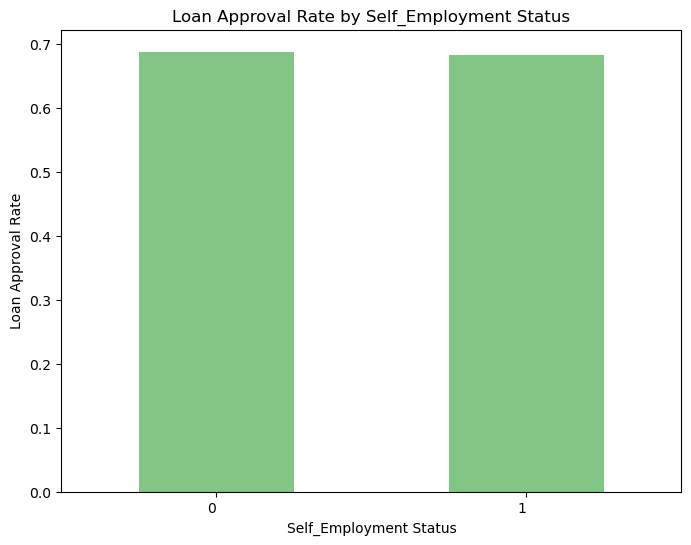

In [31]:
# # Visual representation of how whether someone is self-employed pays their loans
loan_approval_rate = dataset.groupby('Self_Employed')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Self_Employment Status')
plt.xlabel('Self_Employment Status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
The difference is very minimal. 
However, using common knowledge, it would be challenging to track someone who is self-employed, which can present a challenge in debt collection. 
I need to further investigate this. 

In [36]:
pd.crosstab(dataset['Self_Employed'], dataset['Loan_Status'], margins = True)

Loan_Status,0,1,All
Self_Employed,,,
0,166,366,532
1,26,56,82
All,192,422,614


In [37]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Self_Employed'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()  # Total sample size
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramer_v}")
print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Cramér's V: 0.0
Chi2 Statistic: 0.0, P-value: 1.0


In [41]:
print(dataset['Self_Employed'].value_counts())
print(dataset['Loan_Status'].value_counts())


Self_Employed
0    532
1     82
Name: count, dtype: int64
Loan_Status
1    422
0    192
Name: count, dtype: int64


## Analysis
As it stands, there seems to be no relation between being self-employed and loan status. 
I even went ahead to loof for another assessment to determine whether the two had a relation but in truth, there seems to be none. 
It is also important to note that those that are self-employed represent a significantly small percentage of the data (15.4%). This can make it significantly hard to establish a relevant connection between self-employment and loan probability. This means that placing this variable would simply confuse the model, making it think that being self-employed is a bad thing in taking loans. 